In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal

(1) Assume X = 3.0, Y = 7.5
 
 A. As the poisson distribution is set up with the X(mu) value equal to 3,  we can get the background distribution with eight points. And as the background distribution summed up over days, the peak of average becomes more acute.
 
 B. The third graph is the distribution of sum afterr five days. Because the X is constant, the convolved sum of poisson distribution will emphasize the peak and weaken the edges, remaining the shape of poisson distribution.

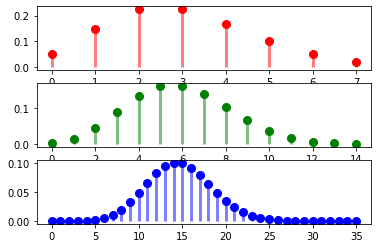

In [97]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
X = 3
Y = 7.5
pts = np.arange(stats.poisson.ppf(0.01, X), stats.poisson.ppf(.99, X))
bg1 = stats.poisson.pmf(pts, X)
ax1.ylim = (0, 1)
ax1.plot(pts, bg1, 'ro', ms=8, label='poisson pmf')
ax1.vlines(pts, 0, bg1, colors='r', lw=3, alpha=0.5)

bg2 = signal.fftconvolve(bg1, bg1)
ax2.plot(np.arange(0, 15), bg2, 'go', ms=8, label='poisson pmf')
ax2.vlines(np.arange(0, 15), 0, bg2, colors='g', lw=3, alpha=0.5)

bg3 = signal.fftconvolve(bg2, bg1)
bg3 = signal.fftconvolve(bg3, bg1)
bg3 = signal.fftconvolve(bg3, bg1)

ax3.plot(np.arange(0, 36), bg3, 'bo', ms=8, label='poisson pmf')
ax3.vlines(np.arange(0, 36), 0, bg3, colors='b', lw=3, alpha=0.5)

ax.legend(loc='best', frameon=False)
plt.show()

C. As each distribution is averaged by days, the probability distribution becomes more flatten overall but the peak of mean becomes more sharpened.

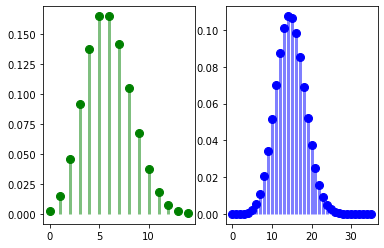

In [46]:
fig, (ax2, ax3) = plt.subplots(1, 2)
X = 3
pts = np.arange(stats.poisson.ppf(0.01, X), stats.poisson.ppf(.99, X))
bg1 = stats.poisson.pmf(pts, X)

bg2 = signal.fftconvolve(bg1, bg1)
ax2.plot(np.arange(0, 15), bg2/sum(bg2), 'go', ms=8, label='poisson pmf')
ax2.vlines(np.arange(0, 15), 0, bg2/sum(bg2), colors='g', lw=3, alpha=0.5)

bg3 = signal.fftconvolve(bg2, bg1)
bg3 = signal.fftconvolve(bg3, bg1)
bg3 = signal.fftconvolve(bg3, bg1)

ax3.plot(np.arange(0, 36), bg3/sum(bg3), 'bo', ms=8, label='poisson pmf')
ax3.vlines(np.arange(0, 36), 0, bg3/sum(bg3), colors='b', lw=3, alpha=0.5)

ax.legend(loc='best', frameon=False)
plt.show()

D. The sigma 

In [84]:
N = 5
prob_1 = stats.poisson(N * (Y-1) + 1).sf(N * (X-1))
sigma_1 = stats.poisson.ppf(prob_1, X*5)
sigma_1

36.0

(2) 
a. As the distribution being averaged for more times, the probability of mean decrease and the x value of mean keeps move toward the center of the graph. The peak of the mean becomes more slim.

b. The shape of distribution becomes thinner and more symmetrical. It is approaching to the shape of Gaussian distribution by keeping averaging, approximately after 10 times.

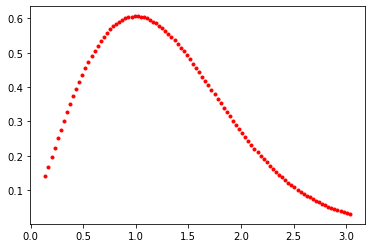

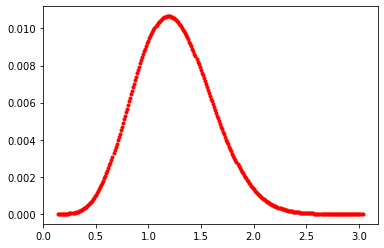

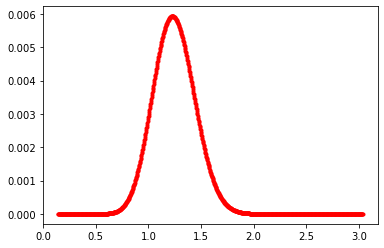

In [50]:
fig, ax = plt.subplots(1, 1)
n = 100
x = np.linspace(stats.rayleigh.ppf(0.01), stats.rayleigh.ppf(0.99), n)
data = stats.rayleigh.pdf(x)
ax.plot(x, data, 'ro', ms=3, label='rayleigh pdf')

data2 = signal.fftconvolve(data, data)
data2 = signal.fftconvolve(data2, data)
fig2, ax2 = plt.subplots()
ax2.plot(np.linspace(stats.rayleigh.ppf(0.01), stats.rayleigh.ppf(0.99), n*3-2), data2/sum(data2), 'ro', ms=3, label='rayleigh pdf')

data3 = signal.fftconvolve(data2, data)
k = 6
for i in range(k):
    data3 = signal.fftconvolve(data3, data)

fig3, ax3 = plt.subplots()
ax3.plot(np.linspace(stats.rayleigh.ppf(0.01), stats.rayleigh.ppf(0.99), n*(k+4) - k-3), data3/sum(data3), 'ro', ms=3, label='rayleigh pdf')

(3) 
a. In version 1, we are trying to confirm the significance of detection of signal in an image send from LIGO, with given signal strength from SWIFT. And we need to compare the result with 5-sigma as measure of discovery of detection.
The width X of the given background Gaussian distribution is assumed to be 4, and the signal strenth Y is assumed to be 3.67928374.
After calculation, we get the sigma of 7.6788848104854335, which is greater than 5. Therefore we can claim that Y of 3.67928374 is a discovery of signal.

In [82]:
X = 4
Y = 3.67928374
mean = 0
rv = stats.norm.pdf(-X, X, 1000)
prob = stats.norm.sf(rv, Y)
sigma = stats.norm.ppf(prob, X)
sigma

7.6788848104854335

b. The question is in what type of background distribution can we find the signal in 10k pixels. I think we might not know the exact type of background distribution within few number of pixels, but since we have as much pixels as 10k, the background distribution should evolve to a Gaussian distribution after summing the probability distribution.

c. So if the brightest candidate is same as the signal in part a) as Y = 3.67928374, according to the result, the significance of the detection has a sigma of 7.6788848104854335, which is greater than 5 sigma.

(4) 
a.